In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv(r"C:\Users\mdfai\Desktop\churn analysis\Customer Churn.csv")
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.isnull().sum().sum()

0

In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [37]:
df["customerID"].duplicated().sum()

0

In [39]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
        
        

In [41]:
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [45]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


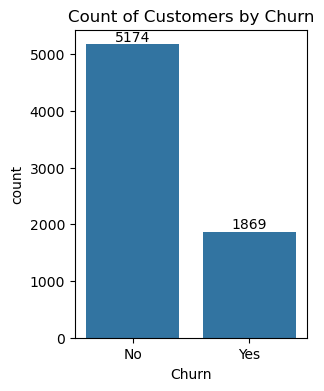

In [121]:
plt.figure(figsize=(3,4))
ax=sns.countplot(data=df,x='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

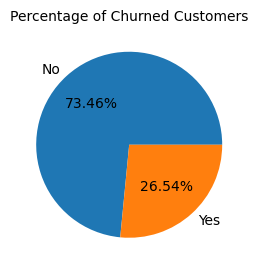

In [87]:
gb=df.groupby(["Churn"]).agg({'Churn':"count"})
plt.figure(figsize=(3,4))
plt.title("Percentage of Churned Customers",fontsize=10)
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.show()




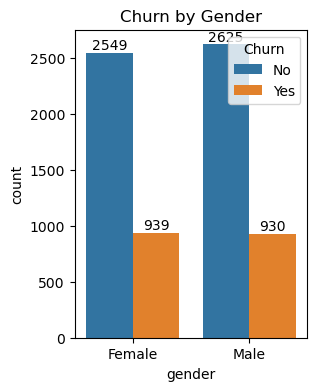

In [351]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x ='gender' ,data = df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Gender")
plt.show()

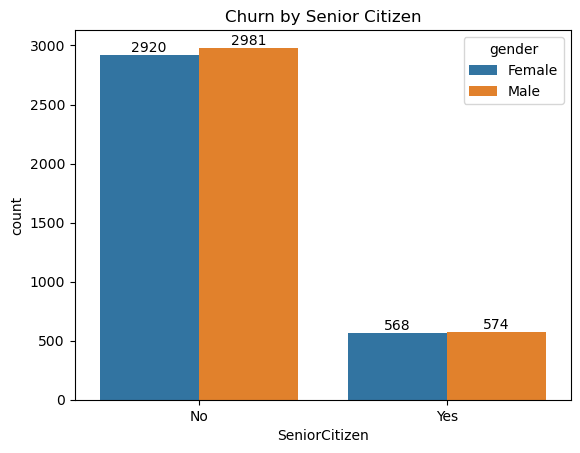

In [349]:
ax=sns.countplot(x= 'SeniorCitizen',data=df,hue='gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Senior Citizen")
plt.show()

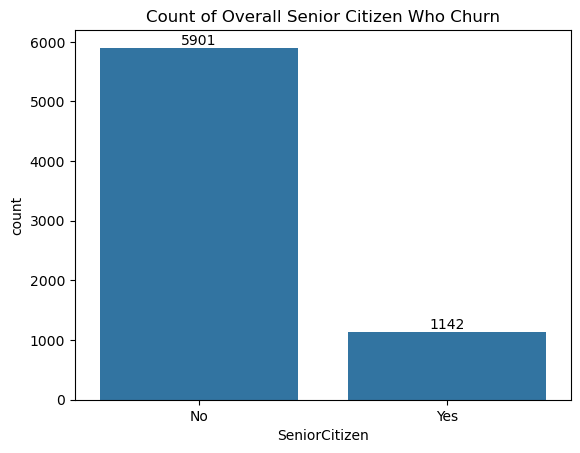

In [347]:
ax=sns.countplot(x="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Overall Senior Citizen Who Churn")
plt.show()

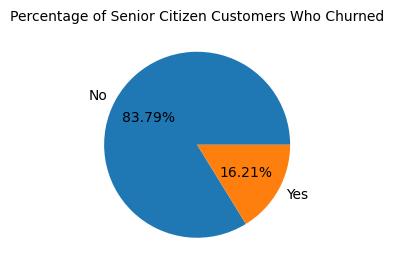

In [201]:
gb=df.groupby(["SeniorCitizen"]).agg({'SeniorCitizen':"count"})
plt.figure(figsize=(3,4))
plt.title("Percentage of Senior Citizen Customers Who Churned",fontsize=10)
plt.pie(gb['SeniorCitizen'],labels=gb.index,autopct="%1.2f%%")
plt.show()



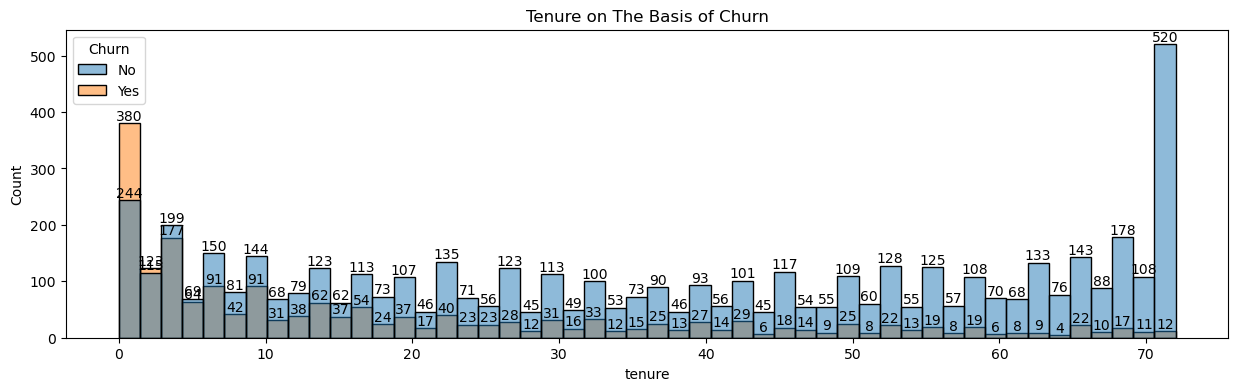

In [343]:
plt.figure(figsize=(15,4))
plt.title("Tenure on The Basis of Churn")
ax=sns.histplot(x='tenure',data=df,bins=50,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

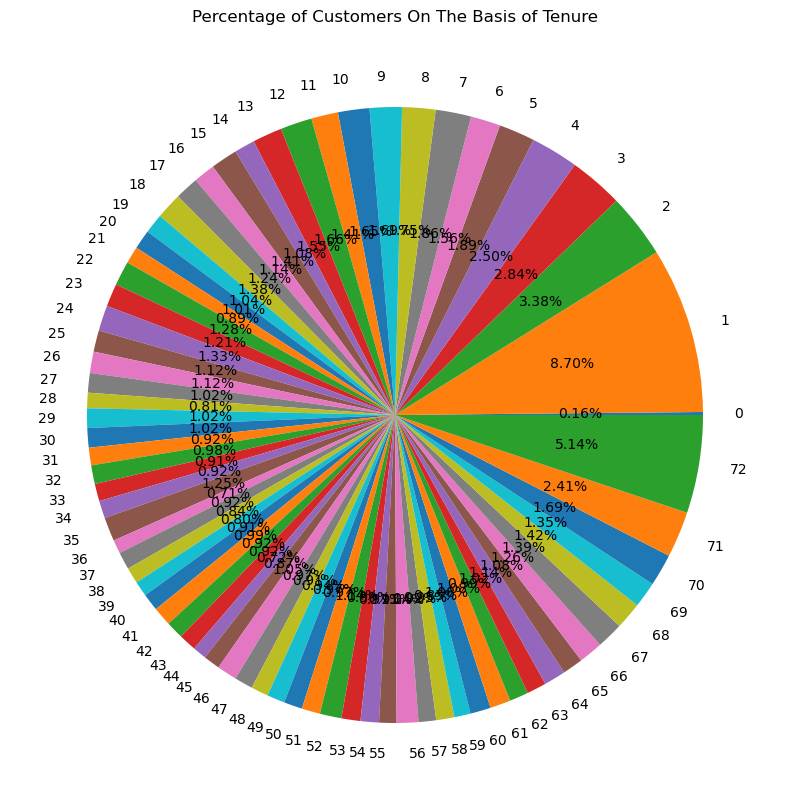

In [271]:
plt.figure(figsize=(10,10))
plt.title("Percentage of Customers On The Basis of Tenure")
gb=df.groupby(["tenure"]).agg({"tenure":"count"})
plt.pie(gb["tenure"],labels=gb.index,autopct="%1.2f%%")
plt.show()

In [269]:
df.shape

(7043, 21)

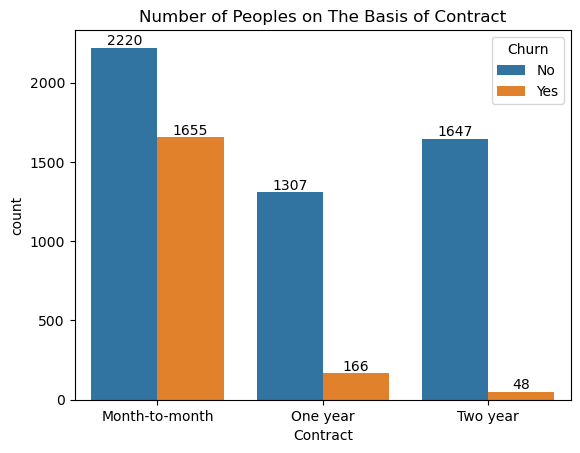

In [335]:
ax=sns.countplot(x="Contract",data=df,hue="Churn")
plt.title("Number of Peoples on The Basis of Contract")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [305]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [307]:
# 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection'

C:\Users\mdfai\AppData\Local\Temp\ipykernel_7408\409018800.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  ax=sns.countplot(x="PhoneService",data=df,hue='gender',color='blue')


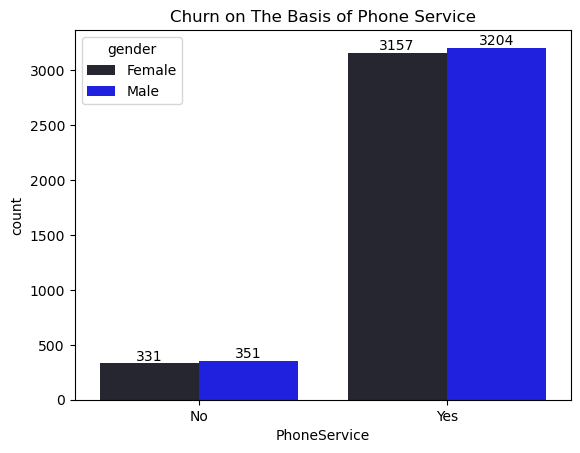

In [369]:
plt.title("Churn on The Basis of Phone Service")
ax=sns.countplot(x="PhoneService",data=df,hue='gender',color='blue')
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
plt.show()

C:\Users\mdfai\AppData\Local\Temp\ipykernel_7408\1726110284.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:chocolate'` for the same effect.

  ax=sns.countplot(x="MultipleLines",data=df,hue='gender',color='chocolate')


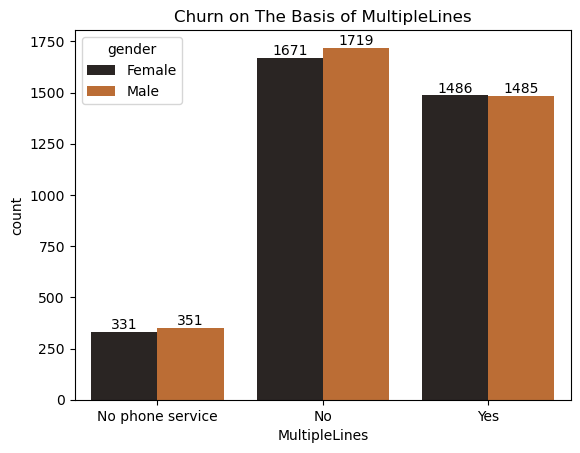

In [373]:
plt.title("Churn on The Basis of MultipleLines")
ax=sns.countplot(x="MultipleLines",data=df,hue='gender',color='chocolate')
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
plt.show()

C:\Users\mdfai\AppData\Local\Temp\ipykernel_7408\2470677040.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  ax=sns.countplot(x="OnlineSecurity",data=df,hue='gender',color='yellow')


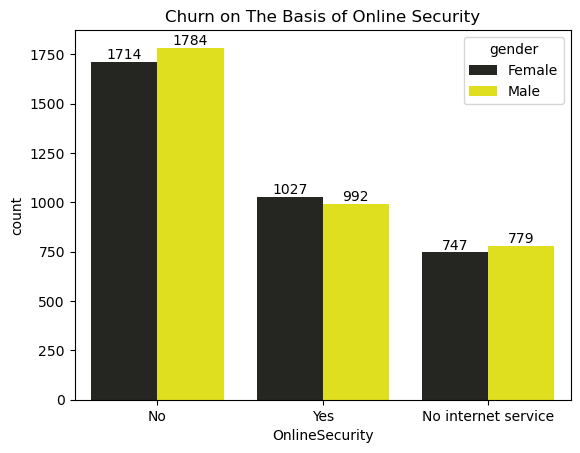

In [371]:
plt.title("Churn on The Basis of Online Security")
ax=sns.countplot(x="OnlineSecurity",data=df,hue='gender',color='yellow')
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
plt.show()

C:\Users\mdfai\AppData\Local\Temp\ipykernel_7408\777822603.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:olive'` for the same effect.

  ax=sns.countplot(x="InternetService",data=df,hue='gender',color='olive')


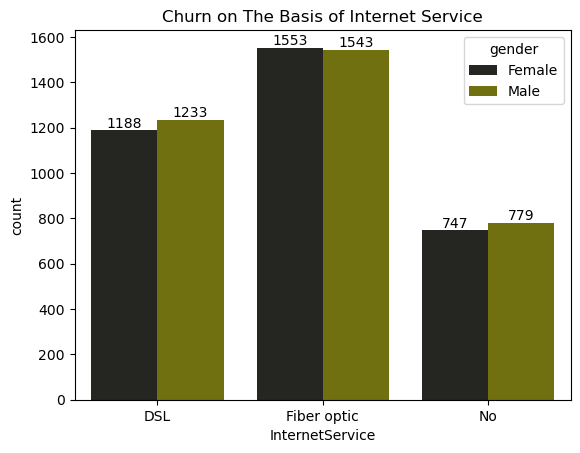

In [375]:
plt.title("Churn on The Basis of Internet Service")
ax=sns.countplot(x="InternetService",data=df,hue='gender',color='olive')
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
plt.show()

C:\Users\mdfai\AppData\Local\Temp\ipykernel_7408\770438944.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:cyan'` for the same effect.

  ax=sns.countplot(x="OnlineBackup",data=df,hue='gender',color='cyan')


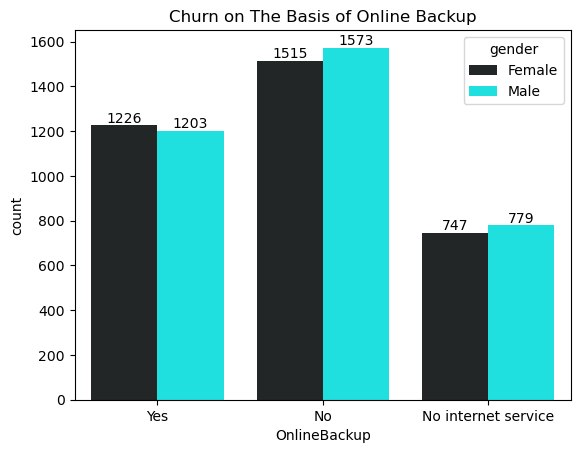

In [367]:
plt.title("Churn on The Basis of Online Backup")
ax=sns.countplot(x="OnlineBackup",data=df,hue='gender',color='cyan')
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
plt.show()

C:\Users\mdfai\AppData\Local\Temp\ipykernel_7408\161523595.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x="DeviceProtection",data=df,hue='gender',color='green')


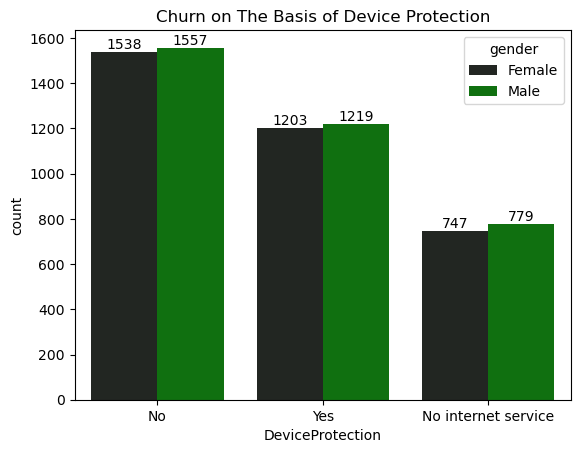

In [365]:
plt.title("Churn on The Basis of Device Protection")
ax=sns.countplot(x="DeviceProtection",data=df,hue='gender',color='green')
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
plt.show()

C:\Users\mdfai\AppData\Local\Temp\ipykernel_7408\822903178.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:gold'` for the same effect.

  ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn',color='gold')


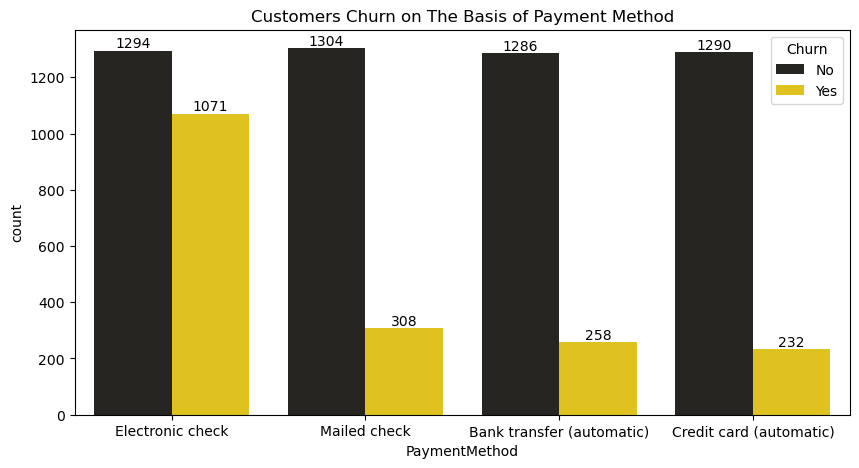

In [407]:
plt.figure(figsize=(10,5))
plt.title("Customers Churn on The Basis of Payment Method")
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn',color='gold')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()